In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

# Remove question mark (missing values) in the raw file
# and save it in a new file 'arrhythmia.data'.
# This needs to be done only once, and all the following experiments can load 'arrhythmia.data' directly
with open('arrhythmia.data.orig') as inputfile:
    with open('arrhythmia.data', 'w') as outputfile:
        for line in inputfile:
            outputfile.write(line.replace('?', ''))

In [17]:
# read the data
df = pd.read_csv('arrhythmia.data', header=None)
y = df.iloc[:, -1]  # The last column is the ground-truth label vector
X = df.iloc[:, :-1]  # The first to second-last columns are the features

In [3]:
X

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
5,13,0,169,51,100,167,321,174,91,107,...,0.0,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1
6,40,1,160,52,77,129,377,133,77,77,...,-0.4,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5
7,49,1,162,54,78,0,376,157,70,67,...,-0.3,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8
8,44,0,168,56,84,118,354,160,63,61,...,0.1,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9
9,50,1,167,67,89,130,383,156,73,85,...,-0.5,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1


In [5]:
y

0       8
1       6
2      10
3       1
4       7
5      14
6       1
7       1
8       1
9      10
10      3
11      1
12     10
13      6
14      1
15      1
16     10
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25     16
26     14
27     10
28      2
29      2
       ..
422     1
423     1
424     9
425     1
426     1
427    10
428     1
429    16
430    10
431     6
432    10
433     3
434     1
435     1
436     1
437     1
438     1
439     1
440     1
441     1
442     1
443    10
444     1
445     1
446     1
447     1
448    10
449     2
450     1
451     1
Name: 279, dtype: int64

In [6]:
type(X)

pandas.core.frame.DataFrame

In [7]:
type(y)

pandas.core.series.Series

([<matplotlib.axis.XTick at 0x7f37cf77f780>,
 <a list of 16 Text xticklabel objects>)

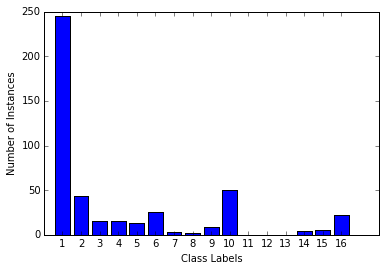

In [9]:
import matplotlib.pyplot as plt
# plot class distribution
x = np.arange(1,17)
h, bins = np.histogram(y, 16)
plt.bar(x-0.4, h)
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.xticks(x)
# We can see that the class distribution is unbalanced with the normal type being the major.
# Class 11, 12 and 13 are missing in the dataset.

In [18]:
# impute the missing data in the dataset
from sklearn.preprocessing import Imputer
# For the missing feature values, we impute it by using the feature's mean value,
# as this tend to improve performance (Jerez, 2010)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = imp.fit_transform(X)
X

array([[  75. ,    0. ,  190. , ...,    2.9,   23.3,   49.4],
       [  56. ,    1. ,  165. , ...,    2.1,   20.4,   38.8],
       [  54. ,    0. ,  172. , ...,    3.4,   12.3,   49. ],
       ..., 
       [  36. ,    0. ,  166. , ...,    1. ,  -44.2,  -33.2],
       [  32. ,    1. ,  155. , ...,    2.4,   25. ,   46.6],
       [  78. ,    1. ,  160. , ...,    1.6,   21.3,   32.8]])

In [19]:
# normalizing the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.73443926, -1.1075202 ,  0.64132669, ...,  1.17773685,
         0.29460309,  1.07867028],
       [ 0.57931213,  0.90291807, -0.03199781, ...,  0.61612582,
         0.0796127 ,  0.50487408],
       [ 0.4577198 , -1.1075202 ,  0.15653305, ...,  1.52874375,
        -0.52087767,  1.0570176 ],
       ..., 
       [-0.63661117, -1.1075202 , -0.00506483, ..., -0.15608935,
        -4.7094834 , -3.3926096 ],
       [-0.87979583,  0.90291807, -0.30132761, ...,  0.82672996,
         0.42063193,  0.92710147],
       [ 1.91682776,  0.90291807, -0.16666271, ...,  0.26511892,
         0.14633386,  0.18008377]])

In [20]:
type(X)

numpy.ndarray

In [23]:
# splitting the dataset to training and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
X_train.shape

(316, 279)

In [25]:
X_test.shape

(136, 279)

In [27]:
y_train.shape

(316,)

In [28]:
y_test.shape

(136,)

In [29]:
type(X_train)

numpy.ndarray

In [30]:
import xgboost
xgb = xgboost.XGBClassifier(objective="multi:softprob", nthread=-1)
xgb.fit(X_train, y_train)
y_train_xgb = xgb.predict(X_train)
y_pred_xgb = xgb.predict(X_test)
print('XGB Train Score:', np.mean(y_train == y_train_xgb))
print('XGB Val Score:', np.mean(y_test == y_pred_xgb))

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGB Train Score: 1.0
XGB Val Score: 0.75


In [31]:
print('XGB Train Score: {:.2f}'.format(xgb.score(X_train, y_train))) # R^2 score: mean accuracy
print('XGB Val Score: {:.2f}'.format(xgb.score(X_val, y_val)))

XGB Train Score: 1.00
XGB Val Score: 0.75


In [32]:
# 10-fold cross validation for XGB
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X, y, cv=10)
print("XGB Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


XGB Accuracy: 0.74 (+/- 0.10)


In [33]:
scores

array([ 0.73076923,  0.75      ,  0.62      ,  0.75      ,  0.73913043,
        0.7804878 ,  0.82926829,  0.73170732,  0.7804878 ,  0.725     ])

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
y_train_gbrt = gbrt.predict(X_train)
y_pred_gbrt = gbrt.predict(X_test)
print('GBRT Train Score: {:.2f}'.format(gbrt.score(X_train, y_train))) # R^2 score: mean accuracy
print('GBRT Val Score: {:.2f}'.format(gbrt.score(X_test, y_test)))

GBRT Train Score: 1.00
GBRT Val Score: 0.77


In [35]:
# 10-fold cross validation for GBRT
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbrt, X, y, cv=10)
print("GBRT Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GBRT Accuracy: 0.73 (+/- 0.15)


In [36]:
scores

array([ 0.71153846,  0.73076923,  0.56      ,  0.70833333,  0.7173913 ,
        0.80487805,  0.82926829,  0.65853659,  0.75609756,  0.8       ])